(credit to Isaac Laughlin for the bulk of this notebook)

In [1]:
import matplotlib
matplotlib.__version__

'3.0.2'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Learning Objectives

1. Say why matplotlib and Jupyter pair well together.
2. Name, recognize, and use the two interfaces to matplotlib.
3. Understand subplots, figures, and axes.
4. Understand the connection between matplotlib and seaborne/pandas.

# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* **Matplotlib**
* **Seaborne**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applicatione | too high |

# plt example

In [35]:
x_data = np.arange(0, 4, .011)

y1_data = np.sin(x_data)
y2_data = np.cos(x_data)

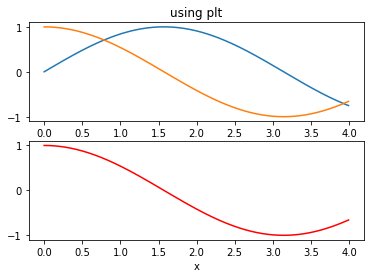

In [4]:
plt.subplot(2, 1, 1)      # #rows, #cols, plotnumber
plt.plot(x_data, y1_data) # First plot
plt.plot(x_data, y2_data) # Second plot in same subplot
plt.title('using plt')

plt.subplot(2, 1, 2)                 # #rows, #cols, plotnumber
plt.plot(x_data, y2_data, color='r') # Second plot in a separate subplot
plt.xlabel('x')

plt.show()

## Weird

`plt` was imported as a library, but it appears to be keeping some state between the last two lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

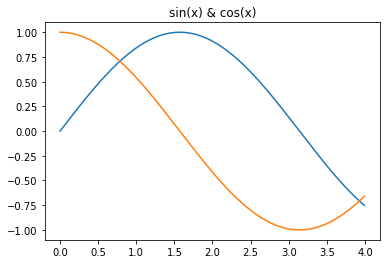

In [5]:
plt.plot(x_data, y1_data)
#We can actually keep adding state here, and it will be reflected when we finally call show.
plt.plot(x_data, y2_data)
plt.title("sin(x) & cos(x)")
plt.show()

Text(0, 0.5, 'Y axis')

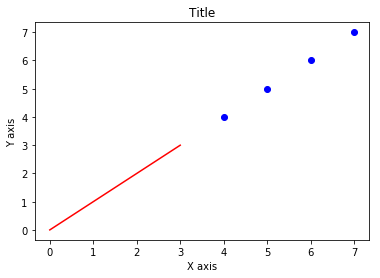

In [22]:
# can put multiple datasets on same plot
plt.plot(range(4), range(4), 'r-', 
         range(4, 8), range(4, 8), 'bo')
plt.title('Title')
plt.xlabel('X axis')
plt.ylabel('Y axis')

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

# Behind the curtain

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)



In [6]:
plt.figure?

In [7]:
fig = plt.figure()
fig.add_subplot?

<Figure size 432x288 with 0 Axes>

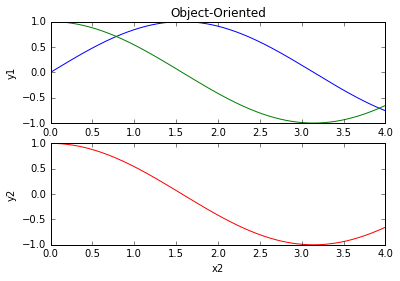

In [8]:
fig = plt.figure()

#ax = fig.add_suplot(111) 

ax1 = fig.add_subplot(2, 1, 1) # or 211
ax1.plot(x_data, y1_data)
ax1.plot(x_data, y2_data)
ax1.set_title('Object-Oriented')
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')

ax2 = fig.add_subplot(2, 1, 2) # or 212
ax2.plot(x_data, y2_data, color='r')
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')

plt.show()

In this example, the fact that state is maintained is less surprising.

Let's make the plot larger, and let's put on subplot on top of the other!

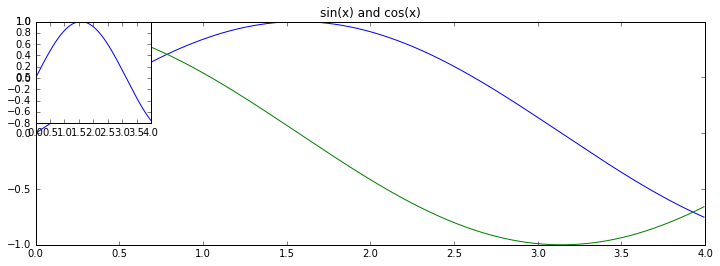

In [9]:
fig = plt.figure(figsize=(12,4))     # <-- figsize!

ax = fig.add_subplot(111)    # #rows, #cols, plotnumber
ax2 = fig.add_subplot(251)   # <-- notice the different #rows, #cols

ax.plot(x_data, y1_data)
ax.plot(x_data, y2_data)
ax.set_title('sin(x) and cos(x)')

ax2.plot(x_data, y1_data)

plt.show()

# Mix 'n' Match

Turns out, you can combine `plt` and object-oriented approach.

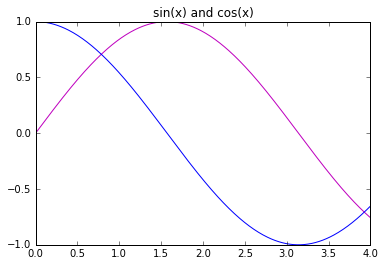

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, color='m')
ax.plot(x_data, y2_data)
plt.title('sin(x) and cos(x)')
plt.show()

# Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

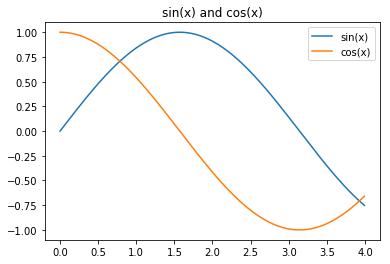

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, label='sin(x)')
ax.plot(x_data, y2_data, label='cos(x)')
ax.set_title('sin(x) and cos(x)')
ax.legend()

# Multiple plots

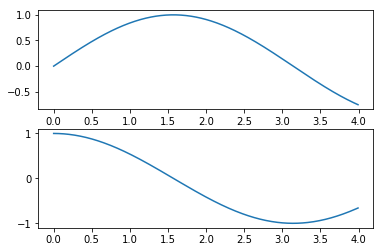

In [9]:
fig, ax_list = plt.subplots(2, 1)      # <-- note: not using plt.figure() anymore
y_funcs = [np.sin, np.cos]
for subp, y_func in zip(ax_list, y_funcs):
    subp.plot(x_data, y_func(x_data))

In [10]:
ax_list

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113311f28>,
      dtype=object)

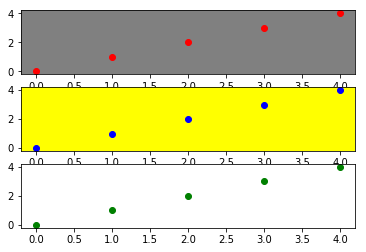

In [21]:
# subplots
fig = plt.figure()

# usage: fit.add_subplot(rows, columns, position)
axes1 = fig.add_subplot(3, 1, 1, facecolor='grey')
axes1.plot(range(5), range(5), 'ro')
axes2 = fig.add_subplot(3, 1, 2, facecolor='yellow')
axes2.plot(range(5), range(5), 'bo')
axes2 = fig.add_subplot(3, 1, 3, facecolor='white')
axes2.plot(range(5), range(5), 'go')

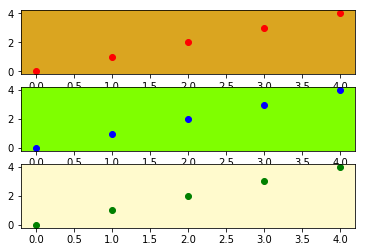

In [23]:
# any HTML color name is valid: http://www.w3schools.com/html/html_colornames.asp
fig = plt.figure()

# usage: fit.add_subplot(rows, columns, position)
axes1 = fig.add_subplot(3, 1, 1, facecolor='goldenrod')
axes1.plot(range(5), range(5), 'ro')
axes2 = fig.add_subplot(3, 1, 2, facecolor='chartreuse')
axes2.plot(range(5), range(5), 'bo')
axes2 = fig.add_subplot(3, 1, 3, facecolor='lemonchiffon')
axes2.plot(range(5), range(5), 'go')


# What about pandas?

In [11]:
# import some demo data
import pandas as pd


df = pd.read_csv('data/playgolf.csv', delimiter='|' )
df.info()

In [ ]:
df.head()

In [ ]:
# .plot is a method inside of DataFrame objects
df[['Temperature','Humidity']].plot(kind='scatter', 
                                    x='Temperature', 
                                    y='Humidity', 
                                    color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d525048>,
      dtype=object)

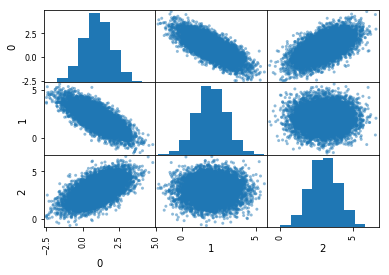

In [24]:
# scatter matrix, to show pairwise relationships

import numpy as np

data = np.random.multivariate_normal(mean=[1, 2, 3], 
                                     cov=[[1, -.75, .6],
                                          [-.75, 1, 0],
                                          [.6, 0 ,1]], 
                                     size=10000)
df = pd.DataFrame(data)

pd.plotting.scatter_matrix(df)

Calling the plot method on a pandas series returns a familiar matplotlib axes object.

          0         1         2
0  1.000000 -0.750127  0.593259
1 -0.750127  1.000000  0.006590
2  0.593259  0.006590  1.000000


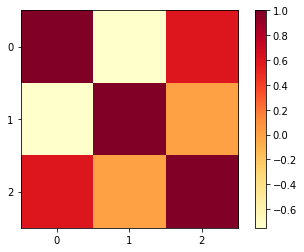

In [25]:
# heatmap of correlations
allcorr = df.corr()
print (allcorr)
plt.imshow(allcorr, cmap='YlOrRd', interpolation='none');
plt.colorbar()
plt.xticks(range(len(allcorr)), allcorr.columns)
plt.yticks(range(len(allcorr)), allcorr.columns)
plt.savefig("heat_map.jpg")
plt.show()

In [26]:
import seaborn as sns

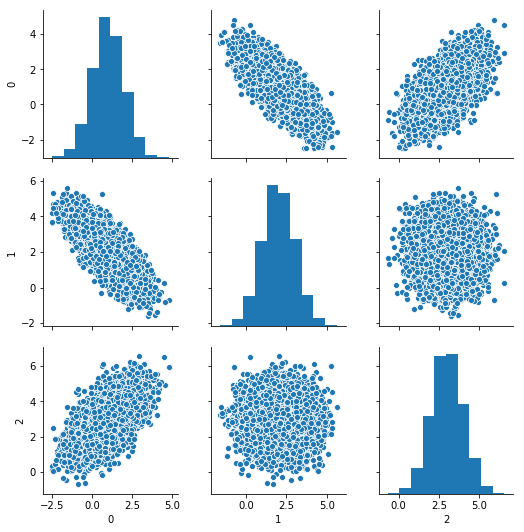

In [27]:
sns.pairplot(df)

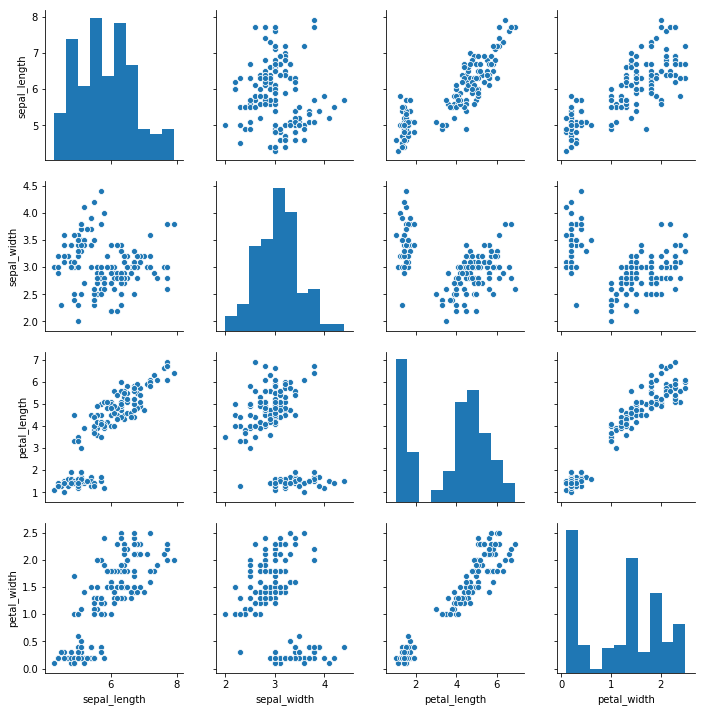

In [30]:
iris = sns.load_dataset("iris")

sns.pairplot(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


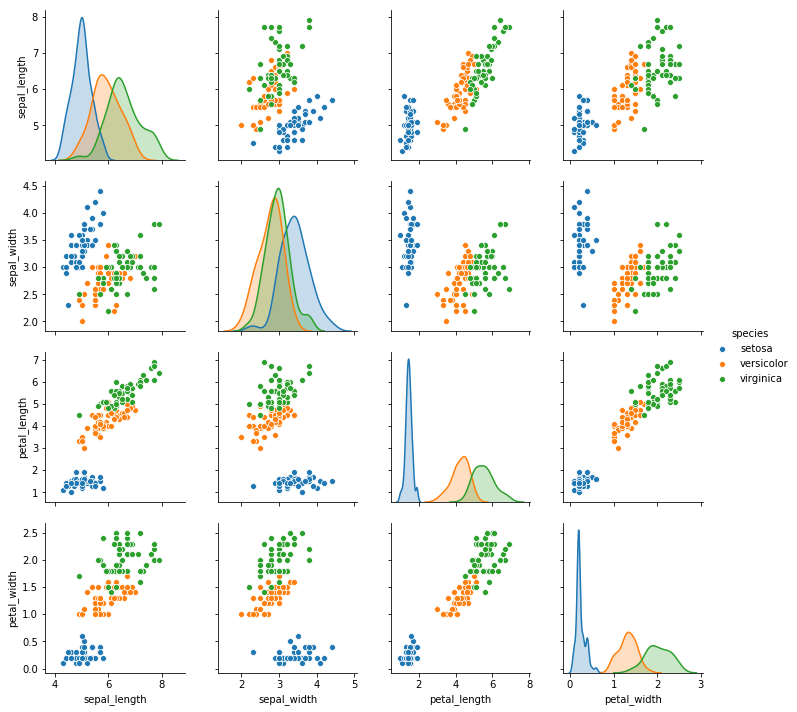

In [34]:
# add color coding to pair plot to visualize 3rd dimension
sns.pairplot(iris, hue='species')
iris.head()


# Writing plotting functions

In [28]:
def my_plotter(ax, data1, data2, **kwargs):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **kwargs)
    return [out]

NameError: name 'y1_data' is not defined

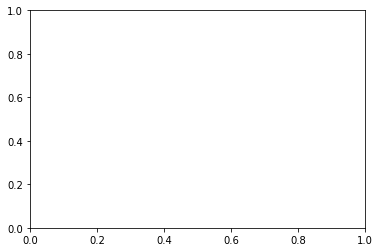

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
my_plotter(ax, x_data, y1_data)
plt.show()

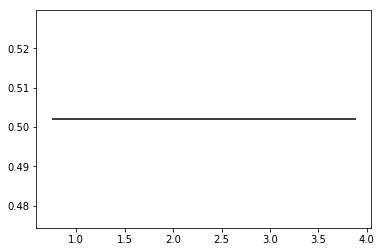

In [5]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]

# Here's an example of how you might use the function above:
fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x_data, .502)
plt.show()

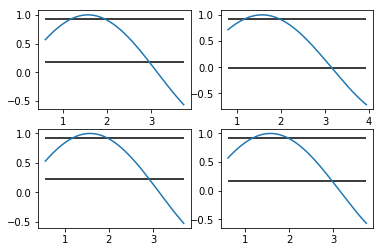

In [6]:
def iqr_plot(ax, x_data, y_data):
    # plot the data
    l1 = ax.plot(x_data, y_data)

    # plot 25th and 75th percentiles a lines
    p25, p75 = np.percentile(y_data, [25, 75])
    l2 = horizontal_line(ax, x_data, p25)
    l3 = horizontal_line(ax, x_data, p75)

    return l1 + l2 + l3


# Here's our 2x2 grid code:
fig, ax_list = plt.subplots(2, 2)

for ax in ax_list.flatten():
    start = np.random.rand()
    x_data = np.linspace(start, start + np.pi, 1000)
    iqr_plot(ax, x_data, np.sin(x_data))

plt.show()